# Исследование объявлений о продаже квартир



В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flat_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 999)      ## чтобы отоброжались все стобцы датафрейма
flat_data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Некоторые столбцы представлены не в том формате, в котором они должны быть

In [4]:
flat_data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Названия населенных пунктов не приведены к единому формату

In [5]:
flat_data.sort_values(by='last_price').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,False,False,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,False,False,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,False,False,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


12190 рублей за квартиру? Похоже на вброс.

### Вывод

В датасете хранится информация о 23699 квартирах, которые находились на продаже за какой-то промежуток времени.
Имеется 22 колонки.

Заметим, что:
- столбец **first_day_exposition** следует перевести в времянной формат
- **floors_total** и **balcony** должны быть в целочисленном формате
- в столбце **locality_name** мы имеем следующие населенные пункты не стандартизированы
- цены на некоторые квартиры слишком занижены. Квартира не может стоить 500 тысяч.
- столбцы **ceiling_height**, **floors_total**, **living_area**, **is_apartment**, **kitchen_area**, **balcony**, **locality_name**, **airports_nearest**, **cityCenters_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest**, **days_exposition** содержат пропущенные значения

### Шаг 2. Предобработка данных

#### Работа с столбцом "locality_name"

Стандартизируем названия населенных пунктов.

Для этого уберем все пропущенные значения в нашем датасете методом .dropna() (мы можем дропнуть значения, т.к их очень мало, а заполнить не сможем)

In [6]:
flat_data = flat_data.dropna(subset=['locality_name']).reset_index(drop=True)
flat_data['locality_name'].isna().sum()

0

Далее, следуя комментариям из кода, мы оставляем только "хорошие" названия населенных пунктов

In [7]:
def find_good_name(x):                                        # функция перебирает значения temp_list и если находит
    for i in temp_list:                                       # совпадения "хорошего" названия с "плохим" названием
        if i in x:                                            # то возвращает "хорошее" название
            return i

temp_list = []
for town in flat_data['locality_name'].unique():
    if 'ё' in town:                                           # заменили букву "ё" на "е", чтобы не было различия в
        town = town.replace('ё', 'е')                         # таких словах как "поселок" и "посёлок"
    for useless in ['поселок ', 'деревня ', 'коттеджный ',
                    'садовое ', 'товарищество ', 'городской ',     # создали отдельный список слов, которые слезует отрезать
                    'городского ', 'типа ', 'при ',              # от нужных нам названий
                    'железнодорожной ', 'станции ', 'село ',
                    'садоводческое ', 'некоммерческое ', 'имени ']:
        if useless in town:                                   
            town = town.replace(useless, '')                  # убираем слова, которые относятся к созданному нами списку 
    temp_list.append(town)                                    # добавляем в новый список, список качественных названий
flat_data['locality_name'] = flat_data['locality_name'].apply(find_good_name)  # методом apply вызываем функцию

In [8]:
flat_data['locality_name'].isna().sum()

63

In [9]:
flat_data = flat_data.dropna(subset=['locality_name'])

In [10]:
flat_data['locality_name'].isna().sum()

0

In [11]:
flat_data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Выборг',
       'Кронштадт', 'Кировск', 'Новое Девяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск', 'Волхов',
       'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино',
       'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Александровская', 'Лопухинк

По итогу мы оставили названия населенных пунктов, с которыми можно работать.

#### Работа с столбцацми "first_day_exposition", "floors_total", "balcony", "last_price"

Еще раз посмотрим на инфомрацию о датасете методом .info()

In [12]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23587 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23587 non-null int64
last_price              23587 non-null float64
total_area              23587 non-null float64
first_day_exposition    23587 non-null object
rooms                   23587 non-null int64
ceiling_height          14454 non-null float64
floors_total            23502 non-null float64
living_area             21697 non-null float64
floor                   23587 non-null int64
is_apartment            2755 non-null object
studio                  23587 non-null bool
open_plan               23587 non-null bool
kitchen_area            21324 non-null float64
balcony                 12103 non-null float64
locality_name           23587 non-null object
airports_nearest        18105 non-null float64
cityCenters_nearest     18128 non-null float64
parks_around3000        18129 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Переведем столбец **first_day_exposition** в времянной формат методом .to_datetime.

In [13]:
flat_data['first_day_exposition'] = pd.to_datetime(flat_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Дропнем пропуски в столбце **floors_total** (их немного, а заполнить пропуски на основе чего-то еще не представляется возможным) и заменим формат на целочисленный

In [14]:
flat_data = flat_data.dropna(subset=['floors_total']).reset_index(drop=True)
flat_data['floors_total'] = flat_data['floors_total'].astype('int')
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменим пропущенные значения столбца **balcony** на нули (логично, что если это значение не указано, то, в большинстве случае, балкона нет совсем) и переведем данынй столбец в целочисленный формат.

Также переведем в целочисленный формат  столбец **last_price**

In [15]:
flat_data['balcony'] = flat_data['balcony'].fillna(0).astype('int')
flat_data['last_price'] = flat_data['last_price'].astype('int')
flat_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.3,4,NaN,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,NaN,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23498,14,3100000,59.00,2018-01-15,3,NaN,5,38.0,4,NaN,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23499,18,2500000,56.70,2018-02-11,2,NaN,3,29.7,1,NaN,False,False,NaN,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23500,13,11475000,76.75,2017-03-28,2,3.00,17,NaN,12,NaN,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Работа с столбцом "ceiling_height"

Посмотрим на гистограмму "ceiling_height" с пропущенными данными и на корреляции с ценой и количеством этажей в доме.

(0, 20)

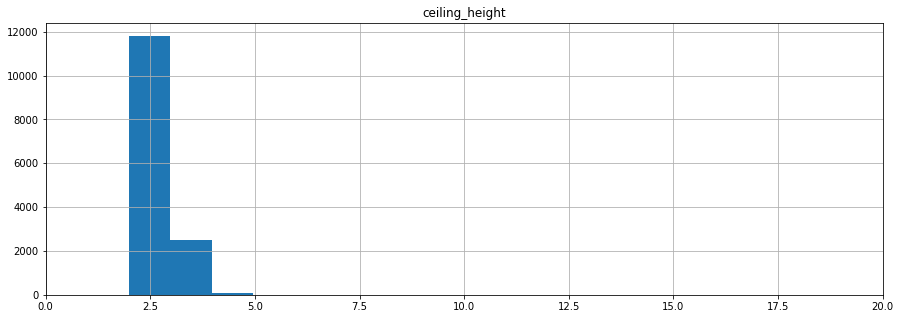

In [16]:
flat_data.hist('ceiling_height', bins=100, figsize=(15,5))
plt.xlim(0, 20)

In [17]:
flat_data['ceiling_height'].corr(flat_data['last_price'])

0.08529057271715401

In [18]:
flat_data['ceiling_height'].corr(flat_data['floors_total'])

-0.028915733233393366

Заполним пропущенные значения используя "ffill" и сравним гистограммы и коэффициенты корреляции с пропущенными значениями и вставленными

In [19]:
flat_data['ceiling_height'] = flat_data['ceiling_height'].fillna(method='ffill')
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,NaN,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


(0, 20)

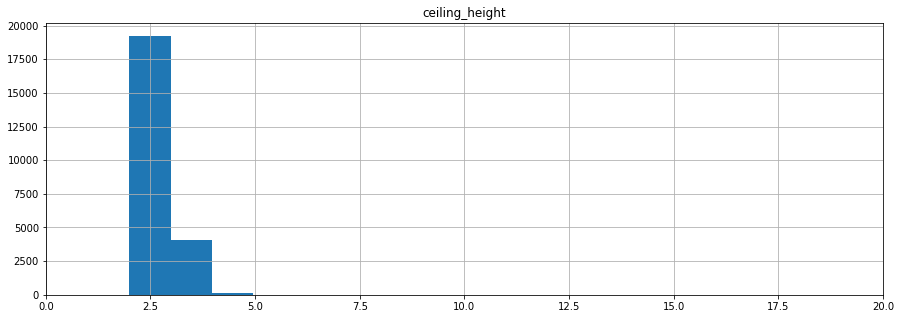

In [20]:
flat_data.hist('ceiling_height', bins=100, figsize=(15,5))
plt.xlim(0, 20)

In [21]:
flat_data['ceiling_height'].corr(flat_data['last_price'])

0.0573868759422088

In [22]:
flat_data['ceiling_height'].corr(flat_data['floors_total'])

-0.009390723278727054

Как мы можем заметить, коэффициенты корреляции поменялись, но лишь на несколько сотых, что является допустимым.
Рисунки гистрограмм, в свою очередь, практически не изменились.

Оставим данную замену в силу того, что нет данных, основываясь на которые можно заполнить пропуски в данном столбце.

In [23]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 22 columns):
total_images            23502 non-null int64
last_price              23502 non-null int64
total_area              23502 non-null float64
first_day_exposition    23502 non-null datetime64[ns]
rooms                   23502 non-null int64
ceiling_height          23502 non-null float64
floors_total            23502 non-null int64
living_area             21645 non-null float64
floor                   23502 non-null int64
is_apartment            2755 non-null object
studio                  23502 non-null bool
open_plan               23502 non-null bool
kitchen_area            21286 non-null float64
balcony                 23502 non-null int64
locality_name           23502 non-null object
airports_nearest        18030 non-null float64
cityCenters_nearest     18053 non-null float64
parks_around3000        18054 non-null float64
parks_nearest           8030 non-null float64
ponds_around3

### Работа с столбцами "living_area", "kitchen_area", "is_apartment", "airports_nearest"

Столбцы **living_area**, **kitchen_area**, **is_apartment**, **airports_nearest**, **parks_around3000**, **parks_nearest**, **ponds_around3000**, **ponds_nearest** не являются основополагающими для построения выводов в поставленной задаче. 

Пропущенные значения в этих столбцах заменим на "-1"

In [24]:
flat_data['living_area'] = flat_data['living_area'].fillna(-1)
flat_data['kitchen_area'] = flat_data['kitchen_area'].fillna(-1)
flat_data['is_apartment'] = flat_data['is_apartment'].fillna(-1)
flat_data['is_apartment'] = flat_data['is_apartment'].fillna(-1)
flat_data['airports_nearest'] = flat_data['airports_nearest'].fillna(-1)
flat_data['parks_around3000'] = flat_data['parks_around3000'].fillna(-1)
flat_data['parks_nearest'] = flat_data['parks_nearest'].fillna(-1)
flat_data['ponds_around3000'] = flat_data['ponds_around3000'].fillna(-1)
flat_data['ponds_nearest'] = flat_data['ponds_nearest'].fillna(-1)

flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 22 columns):
total_images            23502 non-null int64
last_price              23502 non-null int64
total_area              23502 non-null float64
first_day_exposition    23502 non-null datetime64[ns]
rooms                   23502 non-null int64
ceiling_height          23502 non-null float64
floors_total            23502 non-null int64
living_area             23502 non-null float64
floor                   23502 non-null int64
is_apartment            23502 non-null object
studio                  23502 non-null bool
open_plan               23502 non-null bool
kitchen_area            23502 non-null float64
balcony                 23502 non-null int64
locality_name           23502 non-null object
airports_nearest        23502 non-null float64
cityCenters_nearest     18053 non-null float64
parks_around3000        23502 non-null float64
parks_nearest           23502 non-null float64
ponds_aroun

Столбец **cityCenters_nearest** важен для ответа на поставленные вопросы, но невозможно заполнить эти данные, потому что нельзя сказать от чего зависят показатели данного столбца.

Поэтому, так же как и с предыдущими данными, заменим значения этого столбца на "-1"

In [25]:
flat_data['cityCenters_nearest'].fillna(-1, inplace=True)

In [26]:
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 22 columns):
total_images            23502 non-null int64
last_price              23502 non-null int64
total_area              23502 non-null float64
first_day_exposition    23502 non-null datetime64[ns]
rooms                   23502 non-null int64
ceiling_height          23502 non-null float64
floors_total            23502 non-null int64
living_area             23502 non-null float64
floor                   23502 non-null int64
is_apartment            23502 non-null object
studio                  23502 non-null bool
open_plan               23502 non-null bool
kitchen_area            23502 non-null float64
balcony                 23502 non-null int64
locality_name           23502 non-null object
airports_nearest        23502 non-null float64
cityCenters_nearest     23502 non-null float64
parks_around3000        23502 non-null float64
parks_nearest           23502 non-null float64
ponds_aroun

Изменим типы данных столбцов **parks_around3000** и **ponds_around3000**

In [27]:
flat_data['parks_around3000'] = flat_data['parks_around3000'].astype('int')
flat_data['ponds_around3000'] = flat_data['ponds_around3000'].astype('int')

#### Работа с столбцом "days_exposition"

Вероятно, что в данном столбце, не указаные данные соответсвуют тому, что квартира не была продана.
Заменим пропущенные значения на "-1".

In [28]:
flat_data['days_exposition'] = flat_data['days_exposition'].fillna(-1)
flat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 22 columns):
total_images            23502 non-null int64
last_price              23502 non-null int64
total_area              23502 non-null float64
first_day_exposition    23502 non-null datetime64[ns]
rooms                   23502 non-null int64
ceiling_height          23502 non-null float64
floors_total            23502 non-null int64
living_area             23502 non-null float64
floor                   23502 non-null int64
is_apartment            23502 non-null object
studio                  23502 non-null bool
open_plan               23502 non-null bool
kitchen_area            23502 non-null float64
balcony                 23502 non-null int64
locality_name           23502 non-null object
airports_nearest        23502 non-null float64
cityCenters_nearest     23502 non-null float64
parks_around3000        23502 non-null int64
parks_nearest           23502 non-null float64
ponds_around3

Поменяем тип данных столбца

In [29]:
flat_data['days_exposition'] = flat_data['days_exposition'].astype('int')
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,-1,False,False,11.0,2,Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121


### Вывод

Заменили пропущенные значения в столбцах, изменили типы данных.

Датафрейм почти готов к работе, осталось избавиться от аномальных значений. Но для начала добавимим новые столбцы и поработаем с "сырыми" данными

### Добавление новых столбцов

Добавим столбец, соответствующий цене квадратного метра

In [30]:
flat_data['price_sq_m'] = (flat_data['last_price'] / flat_data['total_area']).round(2)
flat_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.37
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,-1,False,False,11.0,2,Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,82920.79
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000,159.0,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


Добавим столбцы дня недели, месяца и года публикации объявления

In [31]:
flat_data['weekday_published'] = flat_data['first_day_exposition'].dt.weekday
flat_data['month_published'] = flat_data['first_day_exposition'].dt.month
flat_data['year_published'] = flat_data['first_day_exposition'].dt.year
flat_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.37,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.6,1,-1,False,False,11.00,2,Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,82920.79,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,-1,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,-1,72490.85,1,3,2017
23498,14,3100000,59.00,2018-01-15,3,3.70,5,38.0,4,-1,False,False,8.50,0,Тосно,-1.0,-1.0,-1,-1.0,-1,-1.0,45,52542.37,0,1,2018
23499,18,2500000,56.70,2018-02-11,2,3.70,3,29.7,1,-1,False,False,-1.00,0,Рождествено,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,44091.71,6,2,2018
23500,13,11475000,76.75,2017-03-28,2,3.00,17,-1.0,12,-1,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.40,1,3,2017


Добавим столбец соответветствующий этажу квартиры

In [32]:
def whatsfloor(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    return 'Другой'

flat_data['category_floor'] = flat_data.apply(whatsfloor, axis=1)
flat_data['category_floor'].unique()

array(['Другой', 'Первый', 'Последний'], dtype=object)

Добавим соотношения жилой площади квартиры к общей и площади кухни к общей.
При это, если соотношение получилось отрицательным, то эти данные учитывать не стоит, т.к или жилая площадь, или площадь кухни не были указаны.

In [33]:
flat_data['living/total_area'] = (flat_data['living_area'] / flat_data['total_area']).round(3)
flat_data['kitchen/total_area'] = (flat_data['kitchen_area'] / flat_data['total_area']).round(3)
flat_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.37,3,3,2019,Другой,0.472,0.231
1,7,3350000,40.40,2018-12-04,1,2.70,11,18.6,1,-1,False,False,11.00,2,Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81,82920.79,1,12,2018,Первый,0.460,0.272
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,Другой,0.612,0.148
3,0,64900000,159.00,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,Другой,-0.006,-0.006
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,Другой,0.320,0.410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23497,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,-1,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,-1,72490.85,1,3,2017,Другой,0.548,0.103
23498,14,3100000,59.00,2018-01-15,3,3.70,5,38.0,4,-1,False,False,8.50,0,Тосно,-1.0,-1.0,-1,-1.0,-1,-1.0,45,52542.37,0,1,2018,Другой,0.644,0.144
23499,18,2500000,56.70,2018-02-11,2,3.70,3,29.7,1,-1,False,False,-1.00,0,Рождествено,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,44091.71,6,2,2018,Первый,0.524,-0.018
23500,13,11475000,76.75,2017-03-28,2,3.00,17,-1.0,12,-1,False,False,23.30,2,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602,149511.40,1,3,2017,Другой,-0.013,0.304


### Вывод

Были добавлены новые столбцы, которые в буудщем помогут с исследованием данных.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучим параметры: площадь, цена, число комнат, высота потолков

Создадим матрицу корреляции с данными: площадь, цена, число комнат, высота потолков

In [34]:
flat_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.653609,0.758865,0.071979
last_price,0.653609,1.000000,0.363456,0.057387
rooms,0.758865,0.363456,1.000000,0.039544
ceiling_height,0.071979,0.057387,0.039544,1.000000


Как мы видим, самый большой показатель корреляции показывает зависимость rooms - total_area, что вполне логично, больше комнат - больше квадратных метров в квартире (следует из здравого смысла, а не из коэффициента корреляции).

Самая маленькая зависимость rooms - ceiling_height (логично, комнаты и потолки едва ли пересекаются).  

Возьмем во внимание, что в данных имеются вбросы.
Отсортируем таблицу по столбцу "last_price"

In [35]:
flat_data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
8721,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,-1,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,-1.0,8,111.83,2,3,2019,Последний,0.294,0.372
14779,5,430000,54.0,2018-06-26,2,2.70,3,-1.0,3,-1,False,False,-1.0,0,Свирь,-1.0,-1.0,-1,-1.0,-1,-1.0,44,7962.96,1,6,2018,Последний,-0.019,-0.019
17308,7,430000,30.4,2019-04-22,1,2.55,2,16.0,1,-1,False,False,6.0,0,Сланцы,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,14144.74,0,4,2019,Первый,0.526,0.197
16137,18,440000,40.0,2018-07-10,1,2.55,5,-1.0,1,-1,False,False,-1.0,0,Старополье,-1.0,-1.0,-1,-1.0,-1,-1.0,45,11000.00,1,7,2018,Первый,-0.025,-0.025
16082,14,450000,38.5,2018-07-11,2,2.65,2,-1.0,1,-1,False,False,-1.0,0,Вахнова Кара,-1.0,-1.0,-1,-1.0,-1,-1.0,45,11688.31,2,7,2018,Первый,-0.026,-0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15518,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,-1,False,False,70.0,0,Санкт-Петербург,32440.0,5297.0,0,-1.0,2,198.0,111,485436.89,0,12,2017,Другой,0.417,0.113
1428,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,-1,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233,1736842.11,2,4,2018,Другой,0.500,0.211
14576,15,401300000,401.0,2016-02-20,5,2.60,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393,1000748.13,5,2,2016,Последний,0.509,0.060
19379,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,-1,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0,-1.0,2,318.0,106,466666.67,2,12,2017,Последний,0.455,0.124


Имеются данные о квартирах с подозрительно маленькой стоимостью. Вряд ли квартира может стоить меньше 1 миллиона рублей.

In [36]:
flat_data.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
22402,16,6000000,55.0,2018-10-31,2,1.00,12,32.4,7,-1,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13,109090.91,2,10,2018,Другой,0.589,0.182
5663,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,-1,False,False,5.20,0,Мга,-1.0,-1.0,-1,-1.0,-1,-1.0,248,35046.73,0,8,2017,Первый,0.643,0.121
16788,14,4195000,42.0,2017-04-23,1,1.75,10,18.8,5,-1,False,False,11.00,1,Санкт-Петербург,29460.0,13656.0,1,399.0,1,628.0,190,99880.95,6,4,2017,Другой,0.448,0.262
16787,10,9500000,72.6,2018-01-16,3,1.75,3,44.1,1,-1,False,False,12.80,2,Гатчина,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,130853.99,1,1,2018,Первый,0.607,0.176
16786,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,-1,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,-1.0,3,80.0,71,102500.00,1,10,2017,Другой,0.435,0.208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21195,19,4900000,42.0,2017-04-18,1,27.50,24,37.7,19,False,False,False,11.00,2,Санкт-Петербург,42742.0,9760.0,0,-1.0,0,-1.0,61,116666.67,1,4,2017,Другой,0.898,0.262
3126,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,-1,False,False,8.00,0,Волхов,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,38666.67,0,11,2018,Другой,0.707,0.107
3127,7,4650000,55.0,2016-02-08,2,32.00,15,28.0,1,-1,False,False,12.00,1,Санкт-Петербург,27666.0,9479.0,1,637.0,0,-1.0,166,84545.45,0,2,2016,Первый,0.509,0.218
22150,19,9999000,92.4,2019-04-05,2,32.00,6,55.5,5,False,False,False,16.50,4,Санкт-Петербург,18838.0,3506.0,0,-1.0,3,511.0,-1,108214.29,4,4,2019,Другой,0.601,0.179


In [37]:
flat_data.sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
22677,0,15000000,25.0,2018-07-25,1,100.00,5,14.0,5,True,False,False,11.00,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19,600000.00,2,7,2018,Последний,0.560,0.440
3127,7,4650000,55.0,2016-02-08,2,32.00,15,28.0,1,-1,False,False,12.00,1,Санкт-Петербург,27666.0,9479.0,1,637.0,0,-1.0,166,84545.45,0,2,2016,Первый,0.509,0.218
22150,19,9999000,92.4,2019-04-05,2,32.00,6,55.5,5,False,False,False,16.50,4,Санкт-Петербург,18838.0,3506.0,0,-1.0,3,511.0,-1,108214.29,4,4,2019,Другой,0.601,0.179
3126,14,2900000,75.0,2018-11-12,3,32.00,3,53.0,2,-1,False,False,8.00,0,Волхов,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,38666.67,0,11,2018,Другой,0.707,0.107
21195,19,4900000,42.0,2017-04-18,1,27.50,24,37.7,19,False,False,False,11.00,2,Санкт-Петербург,42742.0,9760.0,0,-1.0,0,-1.0,61,116666.67,1,4,2017,Другой,0.898,0.262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16786,5,4100000,40.0,2017-10-17,1,1.75,37,17.4,5,-1,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,-1.0,3,80.0,71,102500.00,1,10,2017,Другой,0.435,0.208
16787,10,9500000,72.6,2018-01-16,3,1.75,3,44.1,1,-1,False,False,12.80,2,Гатчина,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,130853.99,1,1,2018,Первый,0.607,0.176
16788,14,4195000,42.0,2017-04-23,1,1.75,10,18.8,5,-1,False,False,11.00,1,Санкт-Петербург,29460.0,13656.0,1,399.0,1,628.0,190,99880.95,6,4,2017,Другой,0.448,0.262
5663,5,1500000,42.8,2017-08-14,2,1.20,2,27.5,1,-1,False,False,5.20,0,Мга,-1.0,-1.0,-1,-1.0,-1,-1.0,248,35046.73,0,8,2017,Первый,0.643,0.121


Средний человеческий рост - 1.65. Высота потолков некоторых квартир меньше 2-х метров, что едва ли возможно.
Также, квартира с высотой потолков 100 метров - звучит неправдоподобно (хрущевка высотой 15 метров).

Построим гистограммы соответствующих значений

(0, 500)

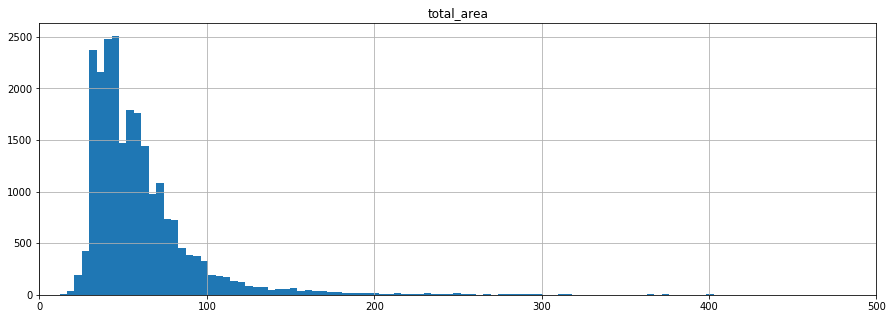

In [38]:
flat_data.hist('total_area', bins=200, figsize=(15, 5))
plt.xlim(0, 500)

(0, 60000000.0)

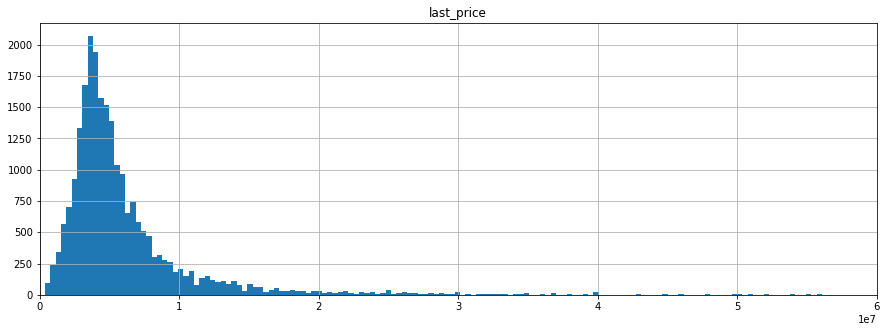

In [39]:
flat_data.hist('last_price', bins=2000, figsize=(15,5))
plt.xlim(0, 0.6e8)

(0, 12.5)

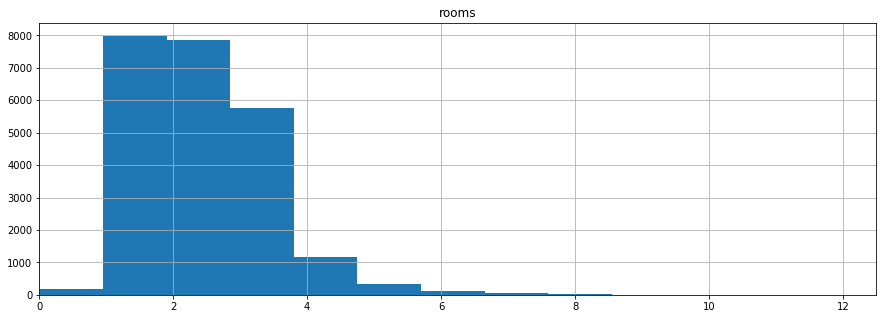

In [40]:
flat_data.hist('rooms', bins=20, figsize=(15,5))
plt.xlim(0, 12.5)

(0, 20)

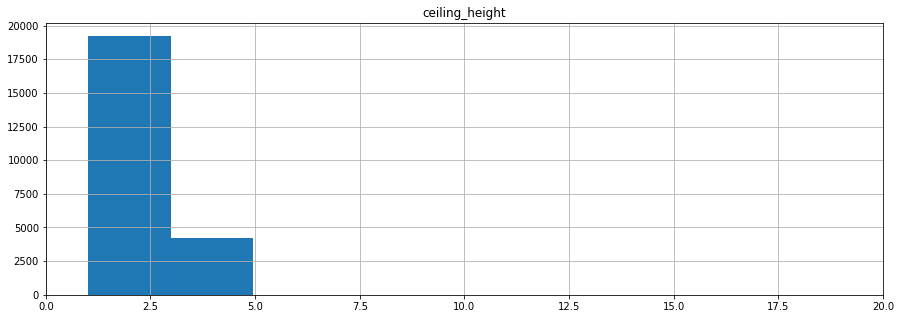

In [41]:
flat_data.hist('ceiling_height', bins=50, figsize=(15,5))
plt.xlim(0, 20)

### Изучим время продажи квартиры

Изучим время продажи квартиры сначала вместе с аномальными данными, а потом уже и без них.

In [42]:
good_data = flat_data.query('days_exposition != -1')
good_data['days_exposition'].describe()

count    20342.000000
mean       180.566758
std        219.523184
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [43]:
good_data['days_exposition'].corr(good_data['last_price'])

0.0812290415633555

Получилось большое стандартное отклонение, что вполне логично, т.к данные не предобработаны, в них есть артефакты, кроме того данные представлены из совершенно разных городов и совершенно разных ценовых категорий.

**Среднее арифметическое** равно 180

**Медиана** равна 95.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62a8945fd0>]],
      dtype=object)

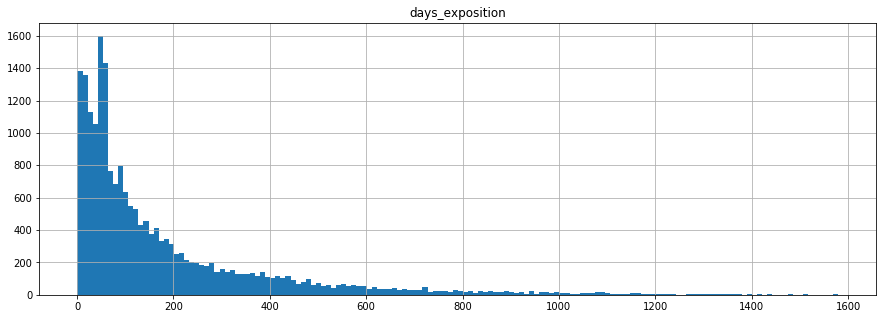

In [44]:
good_data.hist('days_exposition', figsize=(15,5), bins=150)

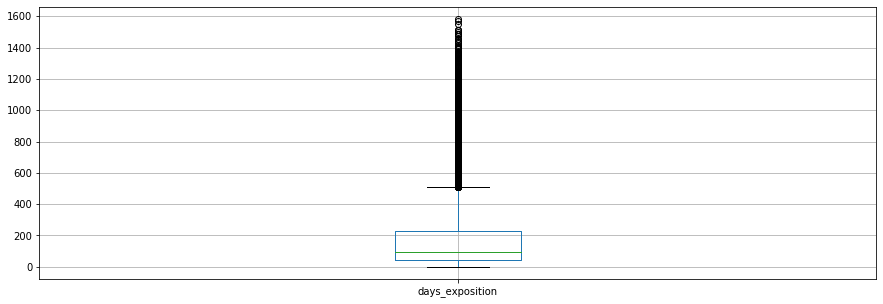

In [45]:
good_data.boxplot('days_exposition', figsize=(15,5))

Большое количество данных сосредоточено в первых ста днях, это видно их гистограммы и диаграммы размаха. Это объясняет то, почему медиана и среднее различаются почти в 2 раза.

Но также прослеживается, что данные "тянутся" далеко. (вплоть до 1600 дней)

### Вывод

Получим, что если квартиру купили быстрее чем за 45 дней,  то продажу следует считать быстрой, если же потребовалось 232 дня и более, то такую продажу можно наззвать долгой.
- Среднее значение - 180
- Медиана - 95

### Избавление от аномальных данных

Посмотим на гистограмму цены квадратного метра

(0, 750000)

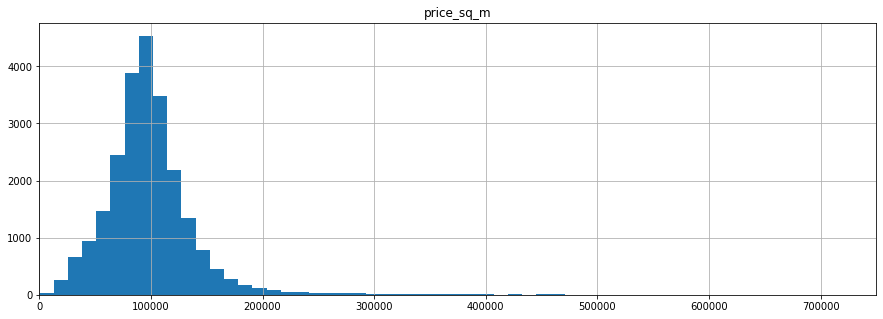

In [46]:
flat_data.hist('price_sq_m', figsize=(15,5), bins=150)
plt.xlim(0, 750000)

Избавися от данных, в которых цена квадратного метра меньше 30 тыс. рублей.

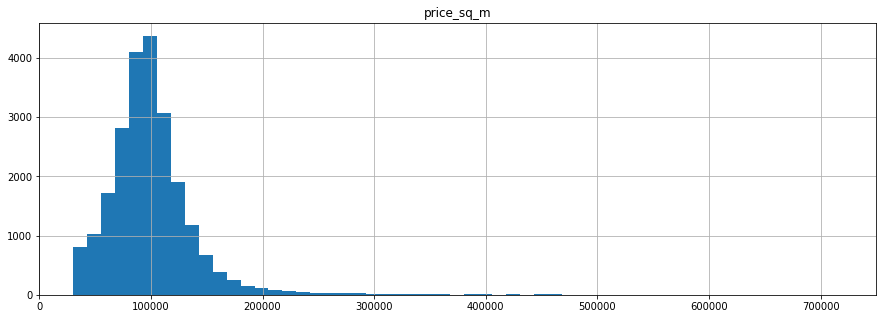

In [47]:
best_data = flat_data.query('price_sq_m > 30000')
best_data.hist('price_sq_m', figsize=(15,5), bins=150)
plt.xlim(0, 750000)
plt.show()

Избавимся от данных в которых квартира была снята с продажи раньше, чем через 14 дней (но при этом оставим те квартиры, в которых значение в данном стобце "-1" )

In [48]:
best_data = best_data[(best_data['days_exposition'] == -1) | (best_data['days_exposition'] > 14)]
best_data.sort_values('price_sq_m', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
12858,19,763000000,400.0,2017-09-30,7,3.50,10,250.0,10,-1,False,False,-1.0,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33,1907500.00,5,9,2017,Последний,0.625,-0.002
1428,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,-1,False,False,40.0,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233,1736842.11,2,4,2018,Другой,0.500,0.211
22639,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,-1,False,False,30.2,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,-1,1542604.80,1,3,2019,Последний,0.340,0.161
14576,15,401300000,401.0,2016-02-20,5,2.60,9,204.0,9,False,False,False,24.0,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393,1000748.13,5,2,2016,Последний,0.509,0.060
4954,20,124000000,124.5,2017-10-12,4,3.00,4,67.2,2,False,False,False,20.0,0,Санкт-Петербург,20399.0,1722.0,3,302.0,3,172.0,45,995983.94,3,10,2017,Другой,0.540,0.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20250,6,1550000,51.4,2016-06-07,2,2.50,5,28.0,2,False,False,False,9.0,1,Любань,-1.0,-1.0,-1,-1.0,-1,-1.0,296,30155.64,1,6,2016,Другой,0.545,0.175
16416,6,2200000,73.0,2018-12-28,3,2.65,5,47.0,1,-1,False,False,8.4,0,Котельский,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,30136.99,4,12,2018,Первый,0.644,0.115
4268,8,2200000,73.0,2017-09-04,3,2.55,5,46.8,4,-1,False,False,8.6,2,Сиверский,-1.0,-1.0,-1,-1.0,-1,-1.0,211,30136.99,0,9,2017,Другой,0.641,0.118
378,11,2600000,86.3,2016-05-24,4,3.00,3,63.0,3,-1,False,False,7.3,1,Волхов,-1.0,-1.0,-1,-1.0,-1,-1.0,-1,30127.46,1,5,2016,Последний,0.730,0.085


Высота потолков не может быть меньше 2.20 и выше хрущевки тоже не может быть

In [49]:
best_data = best_data.query('ceiling_height > 2.20 and ceiling_height < 5')
best_data.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
17642,1,2300000,58.6,2016-05-12,3,2.25,5,44.100002,3,False,False,False,5.5,1,Бегуницы,-1.0,-1.0,-1,-1.0,-1,-1.0,45,39249.15,3,5,2016,Другой,0.753,0.094
5451,17,2200000,56.0,2018-04-02,2,2.30,5,45.000000,1,-1,False,False,9.0,2,Сясьстрой,-1.0,-1.0,-1,-1.0,-1,-1.0,55,39285.71,0,4,2018,Первый,0.804,0.161
17611,20,2300000,54.3,2018-06-28,3,2.30,5,39.000000,2,-1,False,False,5.3,1,Бегуницы,-1.0,-1.0,-1,-1.0,-1,-1.0,189,42357.27,3,6,2018,Другой,0.718,0.098
17612,13,4300000,54.0,2017-11-28,2,2.30,15,44.000000,2,-1,False,False,7.3,1,Санкт-Петербург,22332.0,9220.0,0,-1.0,2,315.0,45,79629.63,1,11,2017,Другой,0.815,0.135
1573,4,4100000,45.6,2016-01-13,2,2.30,9,28.400000,8,False,False,False,7.0,2,Санкт-Петербург,49152.0,14977.0,1,489.0,1,525.0,329,89912.28,2,1,2016,Другой,0.623,0.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18983,10,8650000,87.7,2017-07-18,2,4.70,26,57.400000,26,-1,False,False,25.0,2,Санкт-Петербург,40648.0,9888.0,1,1248.0,0,-1.0,15,98631.70,1,7,2017,Последний,0.655,0.285
2785,7,3250000,31.6,2017-06-07,1,4.80,12,11.400000,4,False,False,False,8.2,0,Сестрорецк,57025.0,33954.0,2,357.0,2,248.0,45,102848.10,2,6,2017,Другой,0.361,0.259
2784,7,14950000,50.0,2016-03-06,2,4.80,3,30.000000,2,-1,False,False,10.0,0,Санкт-Петербург,24433.0,1725.0,1,589.0,3,161.0,160,299000.00,6,3,2016,Другой,0.600,0.200
21738,12,3650000,32.0,2019-02-20,1,4.90,9,17.600000,2,-1,False,False,6.1,0,Санкт-Петербург,21244.0,15256.0,1,832.0,1,146.0,-1,114062.50,2,2,2019,Другой,0.550,0.191


Посмотрим какие результаты покажут данные с выкинутыми артефактами.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62a82e6a90>]],
      dtype=object)

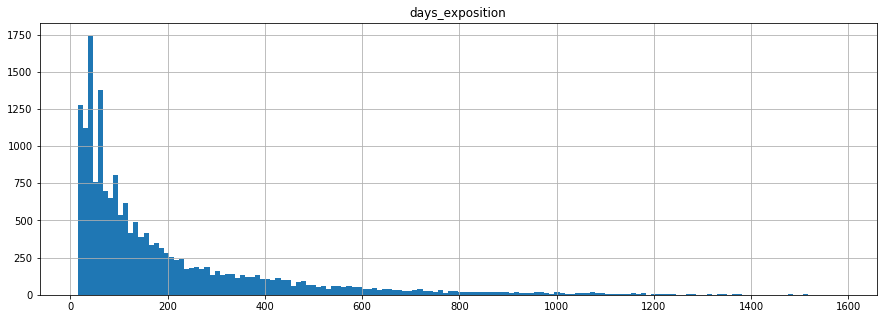

In [50]:
(best_data
    .query('days_exposition != -1')
    .hist('days_exposition', figsize=(15,5), bins=150)
)

In [51]:
(best_data
    .query('days_exposition != -1')['days_exposition']
    .describe()
)

count    18179.000000
mean       197.155234
std        223.255891
min         15.000000
25%         52.000000
50%        111.000000
75%        254.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее 197

Медиана 111

Быстрая покупка меньше 52 дней

Медленная покупка больше 254 дней

### Вывод

Мы убрали подозрительно маленькие и большие данные в столбце **price_sq_m**, **days_exposition**, **ceiling_height**


Мы выяснили, чему равняются среднее значение и медиану, а также ответили на вопрос, когда покупка считается "быстрой", а когда "медленной".


### Определение зависимостей

Найдем зависимость между ценой и количеством квадратных метров квартиры. Для этого воспользуемся корреляцией Пирсона

In [52]:
best_data['last_price'].corr(best_data['total_area'])

0.6523554134272771

Как можно видеть из коэффициента корреляции, зависимость между ценой кваритры и квадратными метрами **есть**, причем достаточно серьезная

Найдем зависимость "цена - количество комнат"

In [53]:
best_data['last_price'].corr(best_data['rooms'])

0.36365178658949326

Есть **средне-маленькая зависимость** между ценой и количеством комнат

Посчитаем медиану стоимости квартир относящихся к категории "Первый" и "Последний"

Среднее арифметическое сильно исказит данные, т.к имеются очень большие цены на квартиры в центре Санкт-Петербурга.

In [54]:
best_data.pivot_table(index='category_floor', values='last_price', aggfunc='median').sort_values(by='last_price')

,last_price
category_floor,
Первый,4000000
Последний,4500000
Другой,4900000


(2000000, 8000000)

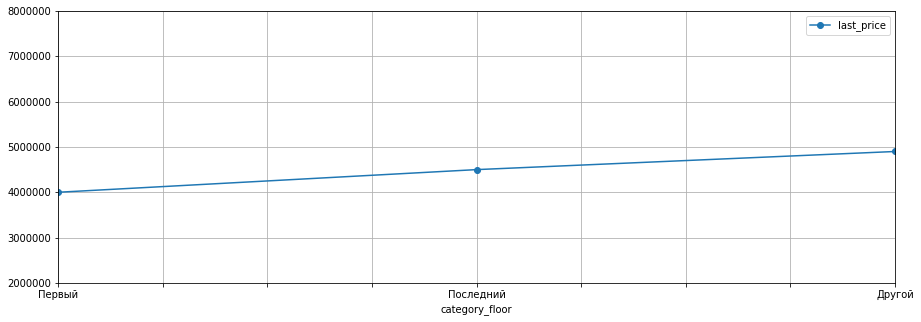

In [55]:
(best_data
 .pivot_table(index='category_floor', values='last_price', aggfunc='median')
 .sort_values(by='last_price').plot(style='o-', figsize=(15,5), grid=True)
)
plt.ylim(2000000, 8000000)

Как мы можем заметить, больше всего ценятся квартиры, находящиеся между первым и последним этажами. Потом уже идут "высокие" квартиры, ну а ценятся меньше всех квартиры, находящиеся на первом этаже

In [56]:
best_data['last_price'].corr(best_data
                             .query('cityCenters_nearest != -1')['cityCenters_nearest']
                            )

-0.20688349671262124

Есть небольшая зависимость цены и удаленности от центра, но это данные в рамках всей Ленинградской области.

Узнаем как обстоят дела только в Петербурге

In [57]:
best_data['last_price'].corr(best_data
                             .query('cityCenters_nearest != -1 and locality_name == "Санкт-Петербург"')['cityCenters_nearest']
                            )

-0.2580157391954013

В Петербурге эта зависимость больше. Но не сильно.

Изучим зависимость цены от даты.

Цена от дня недели

In [58]:
best_data.pivot_table(index='weekday_published',
                      values='last_price',
                      aggfunc=['median'])

,median
,last_price
weekday_published,
0,4700000
1,4800000
2,4800000
3,4800000
4,4650000
5,4650000
6,4600000


(2000000, 8000000)

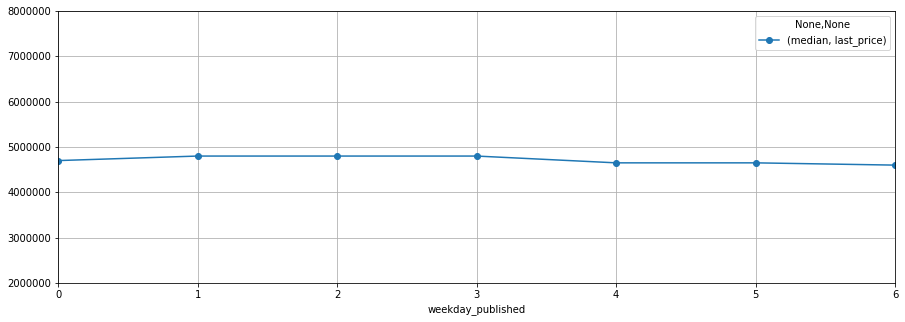

In [59]:
(best_data.pivot_table(index='weekday_published',
                      values='last_price',
                      aggfunc=['median'])
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(2000000, 8000000)

**Стоимость не зависит от дня недели публикации**, т.к все дни недели показывают примерно одинаковые показатели

(2000000, 8000000)

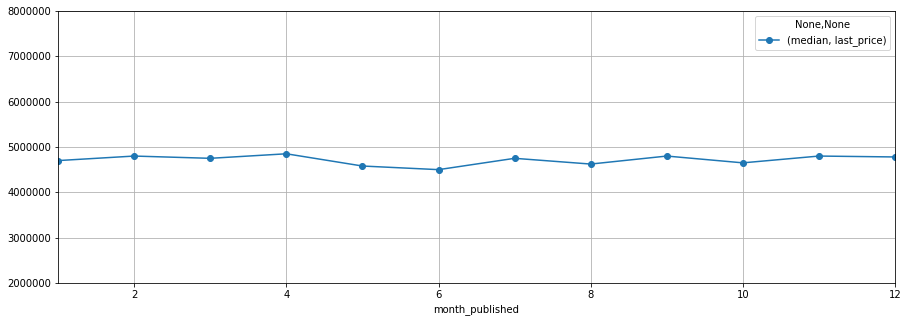

In [60]:
(best_data.pivot_table(index='month_published',
                      values='last_price',
                      aggfunc=['median'])
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(2000000, 8000000)

**Стоимость не зависит от месяца публикации**, т.к все дни недели показывают примерно одинаковые показатели

In [61]:
(best_data
 .pivot_table(index='year_published',
                      values='last_price',
                      aggfunc=['median'])
)

,median
,last_price
year_published,
2014,7868500
2015,5350000
2016,4600000
2017,4575000
2018,4687500
2019,5200000


(2000000, 8000000)

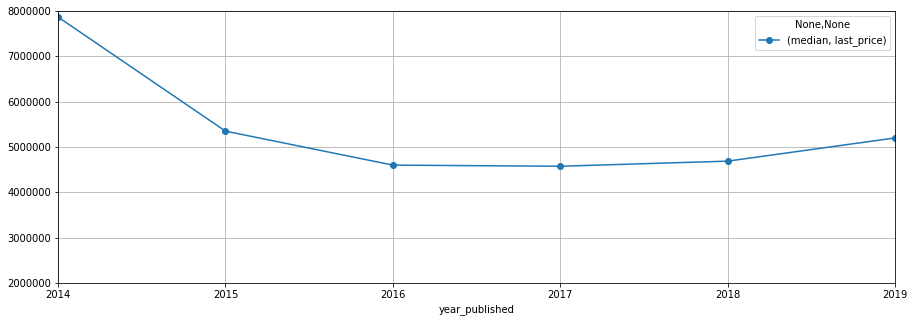

In [62]:
(best_data
 .pivot_table(index='year_published',
                      values='last_price',
                      aggfunc=['median'])
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(2000000, 8000000)

Цена немного разнится в зависимости от года, а если точнее, то видна "просадка" значений в 2016, 2017 годах. На это может влиять экономическая ситуация в стране , а также различные события в том или ином городе.

Посмотрим какое количество квартир было опубликовано в 2014 году

In [63]:
best_data.query('year_published == 2014').shape

(132, 29)

Всего лишь 132 квартиры. Этого недостаточно, чтобы сделать вывод, что с 2014 до 2015 квартиры подешевели в Ленинградской области на 40 процентов.
Несмотря на это, все же, видно, что есть "яма" значений, из-за этого можно сделать вывод:

**Цена зависит от года публикации**

Выделим 10 населенных пунктов с наибольшим числом объявлений.

In [64]:
purchase_power = (best_data
                  .groupby('locality_name')['last_price']
                  .count()
                  .sort_values(ascending=False)
                  .head(10)
                  .index
                 )
purchase_power

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object', name='locality_name')

In [65]:
(best_data[best_data['locality_name'].isin(purchase_power)]
 .pivot_table(index='locality_name', values='price_sq_m')
 .sort_values(by='price_sq_m', ascending=False)
)

,price_sq_m
locality_name,
Санкт-Петербург,115272.095359
Пушкин,102950.026276
Кудрово,95408.732682
Парголово,90003.199764
Мурино,86128.926347
Шушары,78583.651980
Колпино,75047.789379
Всеволожск,68944.560475
Гатчина,68755.953849


Выделим населенные пункты с самым дорогим квадратным метром

In [66]:
most_expensive = (best_data
                  .groupby('locality_name')['price_sq_m']
                  .median()
                  .sort_values(ascending=False)
                  .head(10)
                 )
most_expensive

locality_name
Санкт-Петербург    104979.440
Зеленогорск        103333.330
Пушкин              99987.180
Сестрорецк          99759.620
Левашово            96997.690
Кудрово             96052.630
Парголово           91472.565
Мистолово           90888.890
Стрельна            86785.715
Репино              86542.205
Name: price_sq_m, dtype: float64

Выделим с самым дешевым квадратным метром

In [67]:
cheapest = (best_data
                  .groupby('locality_name')['price_sq_m']
                  .median()
                  .sort_values()
                  .head(10)
                 )
cheapest

locality_name
Сумино           30386.740
Мыза-Ивановка    30694.670
Гладкое          30769.230
Извара           31310.890
Глажево          31362.010
Севастьяново     31451.610
Каменногорск     31746.030
Заклинье         31776.650
Барышево         31841.215
Победа           31972.785
Name: price_sq_m, dtype: float64

### Вывод

По итогу цена зависит больше всего от квадратных метров. После, цена зависит от отдаленности от центра, причем  в Санкт-Петербурге эта зависимость прослеживатеся больше, чем в общих данных.

Мы сделали различные выборки, изучили города с самой дорогой и дешевой жил. площадью Санкт-Петербурга и Ленниградской области.

### Насколько удаленность от центра влияет на стоимость квартиры?

Выделим квартиры, которые находятся в Санкт-Петербурге и у которых была указана дистанция до центра (cityCenters_nearest != -1)

In [68]:
petersburg_best_data = best_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != -1')
petersburg_best_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.37,3,3,2019,Другой,0.472,0.231
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,Другой,0.612,0.148
3,0,64900000,159.00,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,Другой,-0.006,-0.006
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,Другой,0.320,0.410
7,5,7915000,71.60,2019-04-18,2,3.03,24,-1.0,22,-1,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,-1.0,0,-1.0,-1,110544.69,3,4,2019,Другой,-0.014,0.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23492,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,-1,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29,100566.57,2,2,2018,Другой,0.462,0.258
23493,3,5500000,52.00,2018-07-19,2,2.86,5,31.0,2,-1,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,-1.0,15,105769.23,3,7,2018,Другой,0.596,0.115
23494,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,-1,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,-1.0,1,806.0,519,129903.98,3,10,2016,Другой,0.553,0.145
23497,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,-1,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,-1,72490.85,1,3,2017,Другой,0.548,0.103


Отсоритруем таблицу по **cityCenters_nearest**, чтобы увидеть граничные значения

In [69]:
petersburg_best_data.sort_values('cityCenters_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area
13575,2,31099000,159.0,2018-06-25,5,3.28,5,106.0,5,-1,False,False,15.0,0,Санкт-Петербург,21633.0,181.0,2,254.0,3,426.0,-1,195591.19,0,6,2018,Последний,0.667,0.094
1174,1,5800000,33.6,2016-03-10,1,3.70,7,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632.0,208.0,3,304.0,3,503.0,167,172619.05,3,3,2016,Другой,0.679,0.196
8543,7,10990000,100.0,2015-12-16,3,3.90,5,37.8,3,-1,False,False,11.6,0,Санкт-Петербург,21818.0,215.0,3,229.0,2,511.0,265,109900.00,2,12,2015,Другой,0.378,0.116
1922,18,9590000,108.0,2017-05-23,2,3.30,5,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908.0,287.0,3,359.0,3,290.0,69,88796.30,1,5,2017,Другой,0.546,0.102
20697,18,11500000,113.5,2018-09-17,3,4.20,7,44.2,6,-1,False,False,21.7,1,Санкт-Петербург,21739.0,291.0,2,472.0,2,94.0,-1,101321.59,0,9,2018,Другой,0.389,0.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,10,4850000,62.0,2017-05-16,3,3.10,5,35.7,1,False,False,False,7.5,2,Санкт-Петербург,14072.0,28644.0,0,-1.0,0,-1.0,63,78225.81,1,5,2017,Первый,0.576,0.121
11548,16,4700000,51.0,2016-06-07,2,2.60,5,30.0,1,-1,False,False,8.0,0,Санкт-Петербург,14072.0,28644.0,0,-1.0,0,-1.0,539,92156.86,1,6,2016,Первый,0.588,0.157
19731,20,4370000,54.7,2016-03-23,3,2.50,5,32.8,5,-1,False,False,7.1,1,Санкт-Петербург,14234.0,28806.0,0,-1.0,0,-1.0,939,79890.31,2,3,2016,Последний,0.600,0.130
16640,20,4850000,85.8,2019-04-22,3,3.60,3,49.4,2,-1,False,False,12.0,0,Санкт-Петербург,25839.0,29263.0,0,-1.0,0,-1.0,-1,56526.81,0,4,2019,Другой,0.576,0.140


Добавим новый столбец **km_to_centre** - расстояние от центра в километрах и переведем значения в целочисленный тип

In [70]:
petersburg_best_data['km_to_centre'] = (petersburg_best_data['cityCenters_nearest'] / 1000).astype('int')
petersburg_best_data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area,km_to_centre
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,-1,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-1,120370.37,3,3,2019,Другой,0.472,0.231,16
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.3,4,-1,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,Другой,0.612,0.148,13
3,0,64900000,159.00,2015-07-24,3,2.70,14,-1.0,9,-1,False,False,-1.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,Другой,-0.006,-0.006,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,-1,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,Другой,0.320,0.410,8
7,5,7915000,71.60,2019-04-18,2,3.03,24,-1.0,22,-1,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,-1.0,0,-1.0,-1,110544.69,3,4,2019,Другой,-0.014,0.264,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23492,13,3550000,35.30,2018-02-28,1,2.86,15,16.3,4,-1,False,False,9.10,2,Санкт-Петербург,17284.0,16081.0,1,353.0,2,652.0,29,100566.57,2,2,2018,Другой,0.462,0.258,16
23493,3,5500000,52.00,2018-07-19,2,2.86,5,31.0,2,-1,False,False,6.00,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,-1.0,15,105769.23,3,7,2018,Другой,0.596,0.115,6
23494,11,9470000,72.90,2016-10-13,2,2.75,25,40.3,7,-1,False,False,10.60,1,Санкт-Петербург,19424.0,4489.0,0,-1.0,1,806.0,519,129903.98,3,10,2016,Другой,0.553,0.145,4
23497,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,-1,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,-1,72490.85,1,3,2017,Другой,0.548,0.103,4


Сгруппируем датасет по расстоянию от центра и посчитаем среднюю стоимость квартир

In [71]:
sorted_petersburg = petersburg_best_data.groupby('km_to_centre')['last_price'].mean()
sorted_petersburg

km_to_centre
0     2.362451e+07
1     1.913093e+07
2     1.654115e+07
3     1.385790e+07
4     1.362317e+07
5     1.525197e+07
6     1.424128e+07
7     1.310856e+07
8     8.621539e+06
9     6.496715e+06
10    6.504162e+06
11    6.083847e+06
12    6.022531e+06
13    6.095675e+06
14    5.838599e+06
15    5.615878e+06
16    5.546049e+06
17    4.885150e+06
18    5.407492e+06
19    4.688076e+06
20    6.412835e+06
21    5.246514e+06
22    5.505331e+06
23    4.126867e+06
24    3.862235e+06
25    4.020872e+06
26    3.575000e+06
27    8.300000e+06
28    4.756111e+06
29    4.525000e+06
Name: last_price, dtype: float64

Построим график зависимости расстояния до центра и ценой квартиры

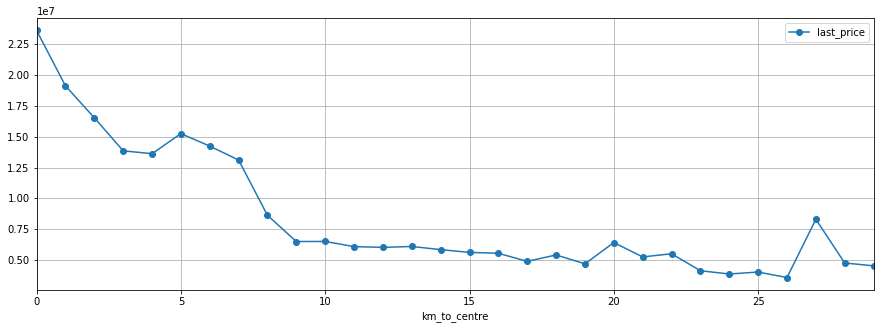

In [72]:
sorted_petersburg.plot(style='o-', x='km_to_centre', y='last_price', figsize=(15,5), grid=True, legend='last_price')

На графике видно, что цена стремительно растет от 7 км до 0. 

Будем считать, что квартиры, находящиеся в радиусе **7 км от центра** - относятся к центру.

Посмотрим на значения, которые попадают на 27-ой киллометр. Есть предположение, что в этих данных находится вброс

In [73]:
petersburg_best_data.query('km_to_centre == "27"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_sq_m,weekday_published,month_published,year_published,category_floor,living/total_area,kitchen/total_area,km_to_centre
741,13,14350000,74.0,2017-11-28,2,3.13,5,30.0,3,-1,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1,1496.0,0,-1.0,128,193918.92,1,11,2017,Другой,0.405,0.338,27
5909,6,2250000,32.0,2018-02-27,1,2.70,2,16.5,2,-1,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0,-1.0,0,-1.0,178,70312.50,1,2,2018,Последний,0.516,0.219,27


Как мы можем заметить, в наших данных есть вброс. Стоимость квадратного метра превышает 190 тыс рублей и это в 27 км от центра!

Мы не сделали фильтр по стоимости квадратного метра, вернее,  по верхней ее границе, т.к квартиры в центре могут стоить баснословные деньги, и будет глупо откинуть их, пытаясь избежать вбросов, похожих на вброс на 27-ом километре.

### Вывод 

Мы выделили сегмент квартир находящихся в центра (радиус 7 км)

### Исследование квартир, находящихся в центре

Узнаем площадь квартир, находящихся в центре

(0, 800)

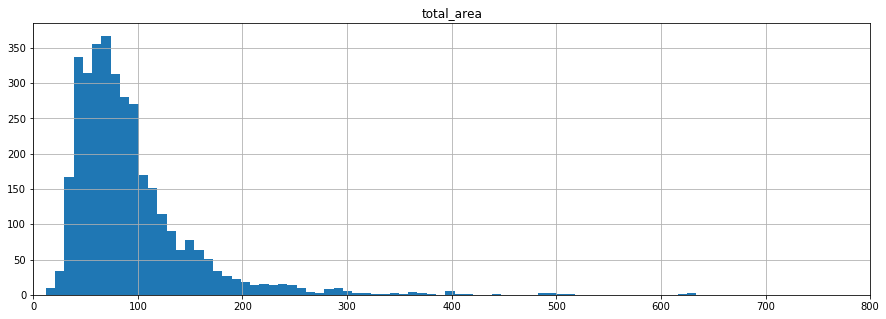

In [74]:
center_flats = petersburg_best_data.query('km_to_centre <= 7')
center_flats.hist('total_area', figsize=(15,5), bins=100)
plt.xlim(0, 800)

In [75]:
center_flats['total_area'].median()

78.25

Медианное значение - 78.25 кв. м.

Найдем этот же параметр, но не у "центральных" квартир

(0, 400)

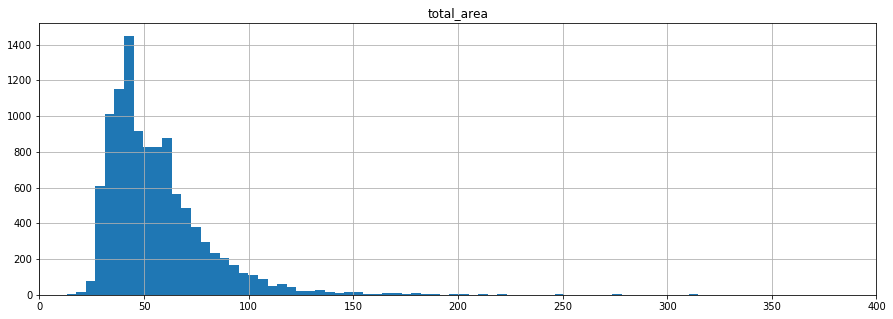

In [76]:
not_center_flats = petersburg_best_data.query('km_to_centre > 7')
not_center_flats.hist('total_area', figsize=(15,5), bins=100)
plt.xlim(0,400)

In [77]:
not_center_flats['total_area'].median()

50.1

Медианная площадь квартир, находящихся в центре 78, остальных 50.

Квартира в центре в среднем больше на 64%

Изучим стоимости кваритр в центре

(0, 150000000.0)

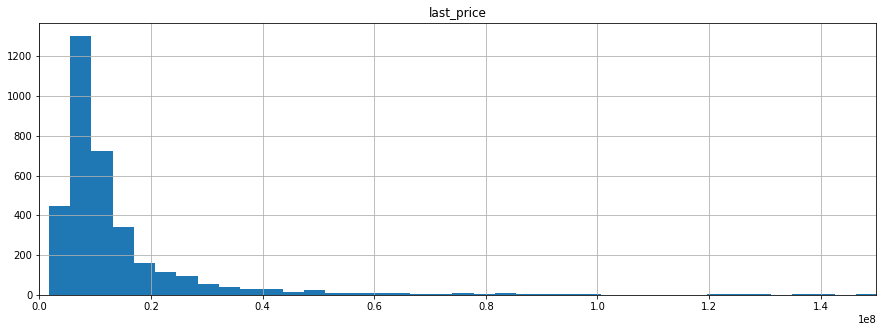

In [78]:
center_flats.hist('last_price', figsize=(15,5), bins=200)
plt.xlim(0, 1.50e8)

In [79]:
center_flats['last_price'].median()

9200000.0

Чаще всего, квартира в центре стоит 9-10 миллионов рублей, но достаточно примеров, когда квартира в центре стоит несколько десяток миллионов рублей.

Узнаем этот же показатель для квартир не из центра

(0, 40000000.0)

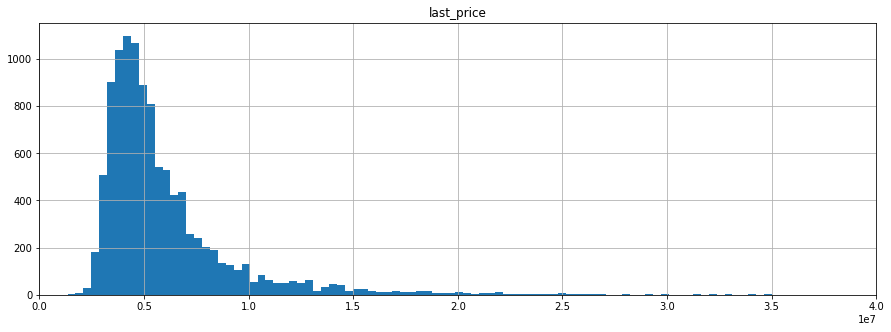

In [80]:
not_center_flats.hist('last_price', figsize=(15,5), bins=200)
plt.xlim(0, 0.4e8)

In [81]:
not_center_flats['last_price'].median()

4999000.0

Квартиры дальше 7 километров от центра стоят в среднем 4-5 миллиона рублей. 

Узнаем среднее количество комнат в "центральных квартирах"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62aa76a750>]],
      dtype=object)

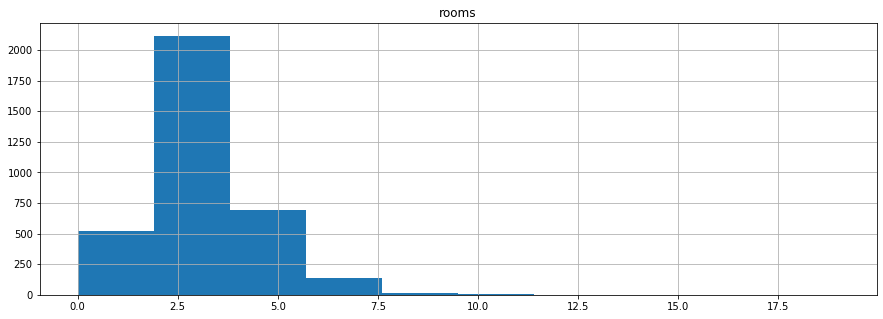

In [82]:
center_flats.hist('rooms', figsize=(15,5))

In [83]:
center_flats['rooms'].median()

3.0

Обычно в таких квартирах 3-4 комнаты

Узнаем сколько комнат в отдаленных квартирах

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62a9de3710>]],
      dtype=object)

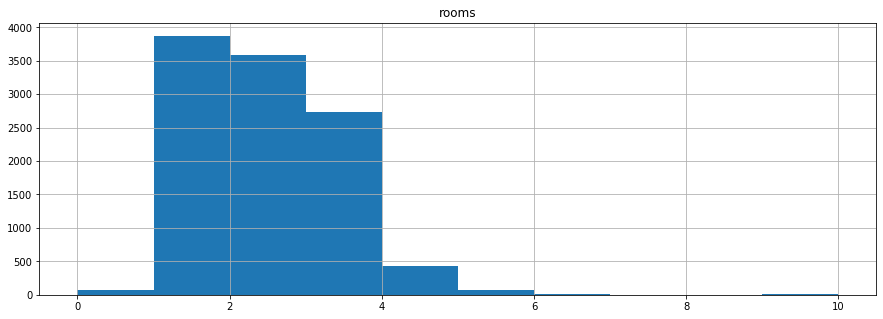

In [84]:
not_center_flats.hist('rooms', figsize=(15,5))

In [85]:
not_center_flats['rooms'].median()

2.0

В отдаленных количество комнат обычно равно 1-2. 

Найдем среднюю высоту потолков в "центральных" квартирах и в остальных.

(2, 6)

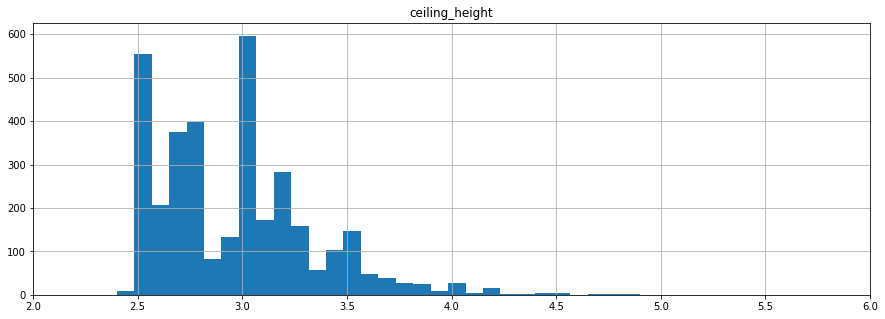

In [86]:
center_flats.hist('ceiling_height', figsize=(15,5), bins=30)
plt.xlim(2, 6)

Есть разные типы застроек, поэтому во многих домах могут быть потолки только 2.70 или только 3 метра. Этим объясняется несколько "всплесков" значений

In [87]:
center_flats['ceiling_height'].median()

2.95

Медианное значение - 2.95 м

Сравним с отдаленными квартирами

(2, 6)

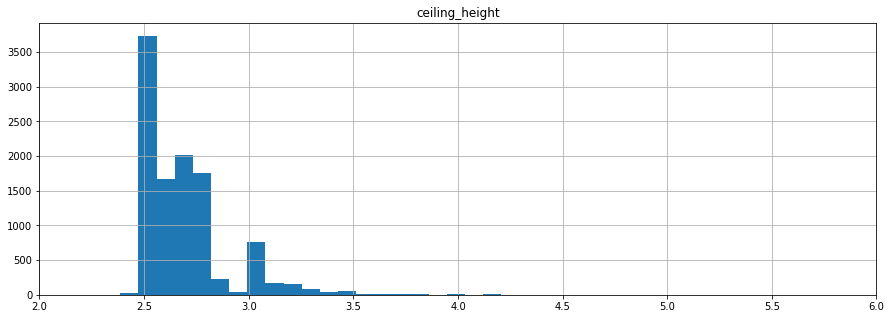

In [88]:
not_center_flats.hist('ceiling_height', figsize=(15,5), bins=30)
plt.xlim(2, 6)

In [89]:
not_center_flats['ceiling_height'].median()

2.64

У центральных квартир и высота потолков выше. 2.95 против 2.64

Выясним различные зависимости.

Зависимость "цена - количество комнат"


Для этого найдем корреляцию Пирсона

In [90]:
center_flats['last_price'].corr(center_flats['rooms'])

0.32776486905691654

Получили **средне-маленькую зависимость**

Похожий результат мы получили и для общих данных (по всей Ленинградской области)

Найдем зависимость между этажом и ценой.

In [91]:
center_flats.pivot_table(index='category_floor', values='last_price', aggfunc='median').sort_values('last_price')

,last_price
category_floor,
Первый,6700000
Последний,9400000
Другой,9600000


(0, 15000000)

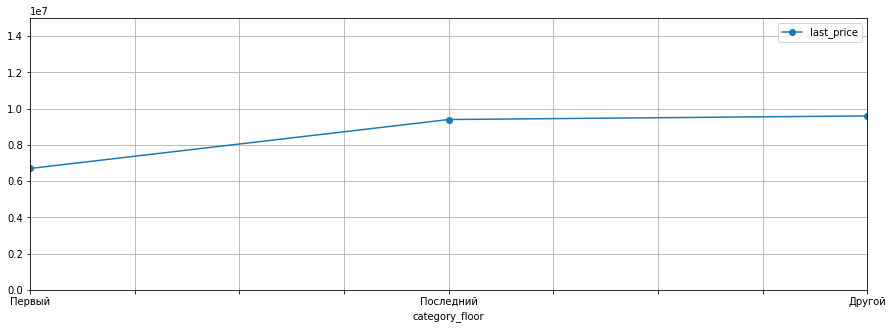

In [92]:
(center_flats
 .pivot_table(index='category_floor', values='last_price', aggfunc='median')
 .sort_values('last_price')
 .plot(style='o-', figsize=(15,5), grid=True)
)
plt.ylim(0, 15000000)

Как и в общих данных, самые дорогие квартиры находятся между первым и последним этажом, далее идет последний этаж, квартиры на первых этажах же ценятся меньше всех.

In [93]:
center_flats['last_price'].corr(center_flats['km_to_centre'])

-0.05402645561799023

Конкретно в центре квартиры уже не так сильно разнятся в своей стоимости, о чем говорит нам коэффициент корреляции.

Т.е для квартир, находящихся в радиусе 7 километров от центра, уже не играет роли, насколько квартира близка к центру.

Узнаем зависит ли стоимость от даты публикации объявления

In [94]:
(center_flats.pivot_table(index='weekday_published',
                      values='last_price',
                      aggfunc='median')
)

,last_price
weekday_published,
0,9499000
1,9325000
2,9300000
3,9410000
4,8990000
5,8594500
6,9200000


(0, 15000000)

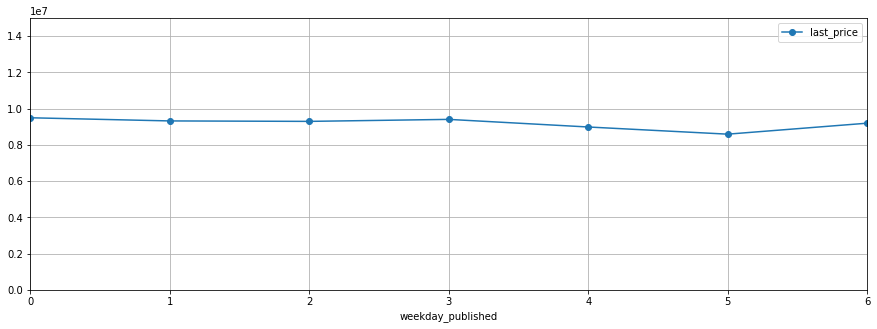

In [95]:
(center_flats.pivot_table(index='weekday_published',
                      values='last_price',
                      aggfunc='median')
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(0, 15000000)

В целом, зависимости **не прослеживается**

In [96]:
(center_flats.pivot_table(index='month_published',
                      values='last_price',
                      aggfunc='median')
)

,last_price
month_published,
1,9900000
2,9500000
3,9500000
4,8950000
5,8900000
6,8945000
7,9200000
8,9100000
9,9495000


(0, 15000000)

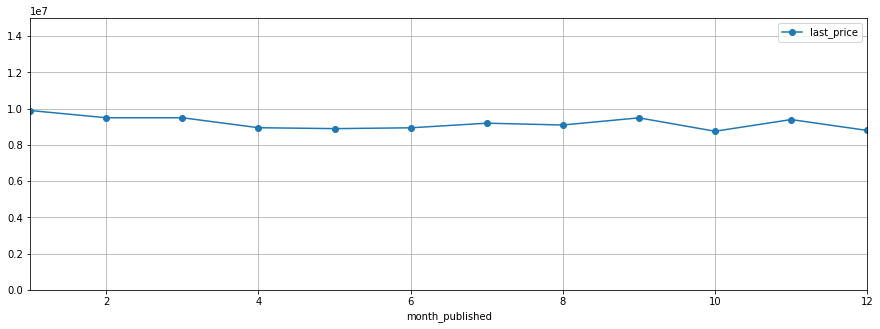

In [97]:
(center_flats.pivot_table(index='month_published',
                      values='last_price',
                      aggfunc='median')
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(0, 15000000)

**Зависимости нет**.

(5000000, 25000000)

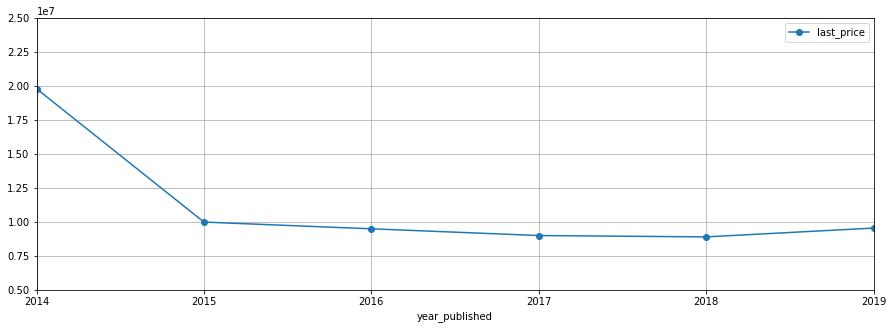

In [98]:
(center_flats.pivot_table(index='year_published',
                      values='last_price',
                      aggfunc='median')
).plot(style='o-', figsize=(15,5), grid=True)
plt.ylim(5000000, 25000000)

В 2017, 2018 году снова видна "просадка" значений.
В 2014 было даже в общих данных недостатчно информации.
Зависимость от года **есть**

### Вывод

Изучили квартиры в центре и определили разницу межу ними и "отдаленными квартирами"

### Шаг 5. Общий вывод

По итогу выяснили, какие квартиры можно называть "центральными", а какие "отдаленными" в Санкт-Петербурге.

В целом, "центральные" квартиры это "отдаленные", но только во всем лучше. В "центральных" квартирах больше квадратных метров, больше комнат, выше потолки, в окно, вероятно, можно разглядеть Казанский собор. Это все оказывает влияние на цену. В среднем она в два раза выше, чем у квартир, находящихся не в центре.

Был проведен исследовательский анализ данных, приведено множество графиков и сводных таблиц.

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [ ]  есть общий вывод